In [14]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [15]:
with open("merged_clean.txt", "r") as f:
    file = f.read().split("\n\n")
    file = np.array(file)
paragraphs = [a for a in file if len(a.split(" ")) > 5]
corpus = [a.replace("\n", " ") for a in paragraphs]

In [16]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(corpus)
words = np.array([a for a in tokenizer.index_word.values()])

print(words[:100])

['<OOV>' 'the' 'and' 'to' 'of' 'a' 'he' 'in' 'was' 'i' 'his' 'that' 'it'
 'her' 'she' 'you' 'with' 'him' 'for' 'had' 'as' 'but' "'" 'they' 'said'
 'on' 'not' 'is' 'at' 'my' 'so' 'be' 'me' 'all' 'this' 'when' 'have' 'one'
 'from' 'then' 'by' 'them' 'which' 'were' 'will' 'out' 'who' 'there' 'up'
 'what' 'little' 'into' 'if' 'no' 'their' 'would' 'man' 'could' 'king'
 'are' 'old' 'came' 'went' 'do' 'very' 'we' 'your' 'now' 'or' 'before'
 'day' 'down' 'an' 'time' 'did' 'been' 'after' 'upon' 'see' 'like' 'where'
 'more' 'go' 'great' 'some' 'over' 'only' 'about' 'come' 'again' 'thou'
 'must' 'back' 'himself' 'two' 'saw' 'took' 'away' 'than' 'how']


In [17]:
vocab_size = 4000
shortened_corpus = []
for line in corpus:
    sequence = tokenizer.texts_to_sequences([line])[0]
    discard = False
    for i in sequence:
        if i > vocab_size:
            discard = True
    if discard == False:
        shortened_corpus.append(line)

print(len(corpus))
print(len(shortened_corpus))
print(shortened_corpus)


39815
8780
["There was once a king's son who told his father that he wished to marry.", "'No, no!' said the king; 'you must not be in such a hurry. Wait till you have done some great deed. My father did not let me marry till I had won the golden sword you see me wear.'", "'Yes, indeed, I've lived long and been much about in the world, but I have never seen or heard anything of what you ask. Still, if you will wait till to-morrow I may be able to tell you something.'", "'Good evening, dear mother,' said he politely.", "'Good evening to you, my dear son,' answered the old woman. 'It is lucky for you that you spoke to me or you would have met with a horrible death. But may I ask where are you going?'", 'This time the water was ready and the girl did not fly away, but she and the prince promised to love each other always. Then they set out for home.', 'At supper that night the queen offered the king all sorts of nice things to eat and drink, but he declared he was not hungry, and went earl

In [18]:
print(len(shortened_corpus))
shortened_corpus = [a for a in shortened_corpus if 5 <=len(a.split(" ")) <= 20]
print(len(shortened_corpus))
print(shortened_corpus)

8780
5260
["There was once a king's son who told his father that he wished to marry.", "'Good evening, dear mother,' said he politely.", 'The crows had hardly done speaking when away they flew. And close upon them followed three pigeons.', 'With that the pigeons flew off and three eagles took their places, and this is what they said:', 'With that they set out on their journey.', 'The old king fell into a tremendous rage. He called his Council together and condemned the servant to death.', 'The prince promised to inquire, and went on his way.', 'The prince said he would do so, and continued his journey.', "'I am looking for Lucky Luck,' replied the prince.", "'Yes, your Majesty, it was I,' answered the prince.", "'But where did you get your army?'", "'If you wish to see it, I can show it you outside the city walls.'", "Not long after there was a grand wedding; perhaps they may all be alive still, but I don't know.", 'The king heard of this and was very angry, and sent for the shepherd t

In [19]:
input_sequences = []
for line in shortened_corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [20]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen = max_sequence_len, padding = "pre")

In [21]:
xs = input_sequences[: ,:-1]
labels = input_sequences[: ,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes = vocab_size + 1)

In [22]:
print(xs[:10])
print(ys[1])

print(len(xs))
print(len(ys))


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  48]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  48   9]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  48   9 137]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   48   9 137   6]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  48
    9 137   6 241]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  48   9
  137   6 241 125]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  48   9 137
    6 241 125  47]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48   9 137   6
  241 125  47 139]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  48   9 137   6 241
  125  47 139  11]
 [  0   0   0   0   0   0   0   0   0   0   0   0  48   9 137   6 241 125
   47 139  11 129]]
[0. 0. 0. ... 0. 0. 0.]
60758
60758


In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size + 1, 240, input_length = max_sequence_len - 1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200)),
    tf.keras.layers.Dense(vocab_size + 1, activation = "softmax")
])

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [32]:
with tf.device('/CPU:0'):
    history = model.fit(xs, ys, epochs = 100 ,verbose = 1, batch_size = 500)

Epoch 1/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.0636 - loss: 6.6124
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.0950 - loss: 5.6458
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.1312 - loss: 5.2459
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.1477 - loss: 5.0056
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.1619 - loss: 4.8306
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.1692 - loss: 4.7121
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.1811 - loss: 4.5782
Epoch 8/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.1886 - loss: 4.4678
Epoch 9/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.1952 - loss: 4.3795
Epoch 10/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.2064 - loss: 4.2727
Epoch 11/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.2076 - loss: 4.2120
Epoch 12/100
122/1

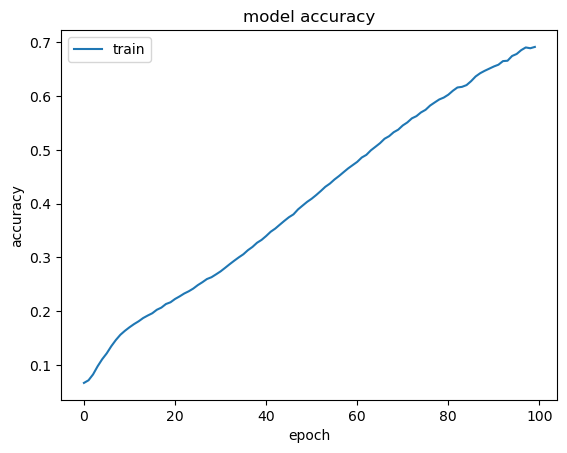

In [29]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
seed_text = "Once upon a"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━